In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
X=iris.data
y=iris.target

In [4]:
X.shape

(150, 4)

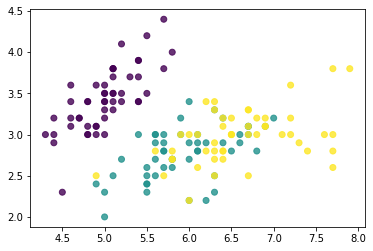

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=5)

In [17]:
Xtrain.shape

(120, 4)

In [18]:
Xtest.shape

(30, 4)

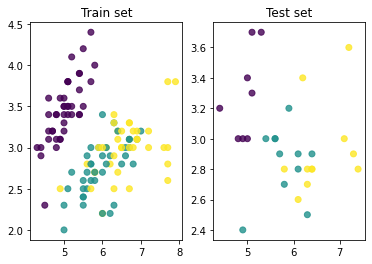

In [19]:
plt.figure()
plt.subplot(121)
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=ytrain,alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest,alpha=0.8)
plt.title('Test set')
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain,ytrain)
model.score(Xtrain,ytrain)  

1.0

In [23]:
model.score(Xtest,ytest)  

0.9

## validation set

In [26]:
#regardez ce qui se passe si on change le nombre de voisins
model=KNeighborsClassifier(n_neighbors=3)
model.fit(Xtrain,ytrain)
print('train score : ', model.score(Xtrain,ytrain))
print('test score : ',model.score(Xtest,ytest)) 

train score :  0.975
test score :  0.9333333333333333


In [27]:
#regardez ce qui se passe si on change le nombre de voisins
model=KNeighborsClassifier(n_neighbors=6)
model.fit(Xtrain,ytrain)
print('train score : ', model.score(Xtrain,ytrain))
print('test score : ',model.score(Xtest,ytest)) 

train score :  0.9833333333333333
test score :  0.9666666666666667


## Cross validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=5,scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [30]:
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.9833333333333334

In [31]:
cross_val_score(KNeighborsClassifier(1),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.975

In [32]:
cross_val_score(KNeighborsClassifier(2),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.9666666666666668

In [33]:
cross_val_score(KNeighborsClassifier(3),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.975

In [34]:
cross_val_score(KNeighborsClassifier(4),Xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.9666666666666668

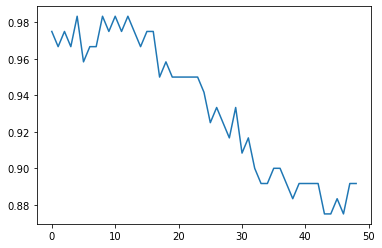

In [36]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),Xtrain,ytrain,cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

## boucle initule car il existe : VALIDATION CURVE

In [38]:
from sklearn.model_selection import validation_curve

In [39]:
model=KNeighborsClassifier()
k=np.arange(1,50)

train_score,val_score=validation_curve(model,Xtrain,ytrain, 'n_neighbors',k,cv=5)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [40]:
val_score.shape

(49, 5)

In [41]:
val_score

array([[1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.

In [43]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

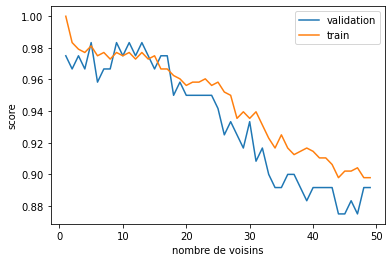

In [47]:
plt.plot(k, val_score.mean(axis=1),label='validation')
plt.plot(k, train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('nombre de voisins')
plt.legend()

## il existe de multiples hyperparamètres dans chaque modèle => gridsearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan','minkowski']}

In [60]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [61]:
 grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [62]:
grid.best_score_

0.9833333333333334

In [63]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [64]:
model=grid.best_estimator_ #pour sauver le modèle le meilleur

In [65]:
model.score(Xtest,ytest)

0.9333333333333333

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(ytest,model.predict(Xtest))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

## learning curve

In [68]:
from sklearn.model_selection import learning_curve

In [69]:
np.linspace(0.2,1.0,5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [75]:
N,train_score,val_score=learning_curve(model,Xtrain, ytrain, train_sizes=np.linspace(0.1,1.0,20),cv=5)

In [76]:
N

array([ 9, 14, 18, 23, 27, 32, 36, 41, 45, 50, 55, 59, 64, 68, 73, 77, 82,
       86, 91, 96])

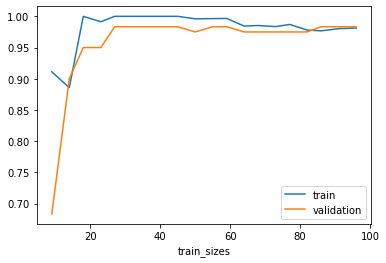

In [77]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

## les différentes techniques de Cross validation

In [78]:
from sklearn.model_selection import KFold

In [80]:
cv=KFold(5)  #nombre de découpes
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.95833333, 1.        , 0.95833333, 0.95833333])

In [81]:
from sklearn.model_selection import LeaveOneOut

In [82]:
cv=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)
#on n'obtien que des 1 ou des 0 normal puisque la validation se fait surnune seule donnée

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [83]:
from sklearn.model_selection import ShuffleSplit

In [84]:
cv=ShuffleSplit(4,test_size=0.2) #nombre de découpage et proportion du jeu de validation
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 0.95833333, 1.        , 1.        ])

In [85]:
from sklearn.model_selection import StratifiedKFold

In [86]:
cv=StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([0.96666667, 1.        , 1.        , 0.93333333])

In [87]:
from sklearn.model_selection import GroupKFold

In [88]:
cv=GroupKFold(5).get_n_splits(Xtrain,ytrain,groups=X[:,0])
cross_val_score(KNeighborsClassifier(),Xtrain,ytrain,cv=cv)

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])